In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
import gmaps
import requests
import gmaps.datasets
import ipywidgets as widgets
import seaborn as sns; sns.set(style='white')
import gmaps.geojson_geometries
from matplotlib.cbook import boxplot_stats


In [2]:
from configMarc import g_key
gmaps.configure(api_key=g_key)

In [3]:
# Study data files
owidCovidData = "Resources/owid-covid-data-20210430.csv"
transparencyData = "Resources/Transparency Index.csv"
RegionData = "Resources/EuropeRegions.csv"

CovidData = pd.read_csv(owidCovidData)
Transparency = pd.read_csv(transparencyData)
Regions = pd.read_csv(RegionData)

In [57]:
# eliminate extra columns
CovidClean = CovidData.copy()
CovidClean.drop(['new_cases', 'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed', 'new_cases_per_million', 
                 'new_cases_smoothed_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 
                 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 
                 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 
                 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 
                 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 
                 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'stringency_index',
                 'median_age', 'aged_65_older', 'aged_70_older', 'extreme_poverty', 'cardiovasc_death_rate',
                 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy',
                 'people_fully_vaccinated_per_hundred'], axis = 1, inplace = True)

# limit to max date
CovidEuro = CovidClean[CovidClean['continent'].isin(['Europe'])]
CovidEuro = CovidEuro[CovidEuro['date'].isin(['2021-04-30'])]

# rename "Location" to "Country"
CovidEuro.rename(columns={"location":"Country"}, inplace=True)

# rename everything else for ease
CovidEuro.rename(columns={'total_cases_per_million': "CasesPerMil", 'total_deaths_per_million': "DeathsPerMil", "total_cases":"Cases", "total_deaths": "Deaths", "population": "Population", 
                           "population_density": "Density","gdp_per_capita": "GDP", "human_development_index": "HDI"}, inplace=True)

# merge with Transparency (inner join)
CovidEuro = pd.merge(CovidEuro, Transparency, on=["Country"], how="inner")
CovidEuro.drop(['Rank'], axis = 1, inplace = True)

# merge with regions
CovidEuro = pd.merge(CovidEuro, Regions, on = ["Country"], how = "inner")
CovidEuro.drop(['Notes'], axis = 1, inplace = True)

# # drop lines with null values
CovidEuro.dropna(how = "any", inplace = True)

CovidEuro.to_csv("Resources/CovidWorkingDataEuro.csv", index = False)

CovidEuro

iso_code continent                 Country        date      Cases  \
0       ALB    Europe                 Albania  2021-04-30   131085.0   
1       AUT    Europe                 Austria  2021-04-30   618870.0   
2       BLR    Europe                 Belarus  2021-04-30   358738.0   
3       BEL    Europe                 Belgium  2021-04-30   990229.0   
4       BIH    Europe  Bosnia and Herzegovina  2021-04-30   198461.0   
5       BGR    Europe                Bulgaria  2021-04-30   404380.0   
6       HRV    Europe                 Croatia  2021-04-30   332183.0   
7       CYP    Europe                  Cyprus  2021-04-30    65233.0   
8       CZE    Europe                 Czechia  2021-04-30  1630758.0   
9       DNK    Europe                 Denmark  2021-04-30   251249.0   
10      EST    Europe                 Estonia  2021-04-30   122019.0   
11      FIN    Europe                 Finland  2021-04-30    86808.0   
12      FRA    Europe                  France  2021-04-30  5677835.0   
13      DEU    Europe                 Germany  2021-04-30  3405365.0   
14      GRC    Europe                  Greece  2021-04-30   345033.0   
15      HUN    Europe                 Hungary  2021-04-30   779348.0   
16      ISL    Europe                 Iceland  2021-04-30     6472.0   
17      IRL    Europe                 Ireland  2021-04-30   248870.0   
18      ITA    Europe                   Italy  2021-04-30  4022653.0   
20      LVA    Europe                  Latvia  2021-04-30   118558.0   
21      LTU    Europe               Lithuania  2021-04-30   247269.0   
22      LUX    Europe              Luxembourg  2021-04-30    67205.0   
23      MLT    Europe                   Malta  2021-04-30    30292.0   
24      MDA    Europe                 Moldova  2021-04-30   250837.0   
25      MNE    Europe              Montenegro  2021-04-30    97389.0   
26      NLD    Europe             Netherlands  2021-04-30  1522973.0   
27      MKD    Europe         North Macedonia  2021-04-30   152367.0   
28      NOR    Europe                  Norway  2021-04-30   112970.0   
29      POL    Europe                  Poland  2021-04-30  2792142.0   
30      PRT    Europe                Portugal  2021-04-30   836493.0   
31      ROU    Europe                 Romania  2021-04-30  1055265.0   
32      RUS    Europe                  Russia  2021-04-30  4750755.0   
33      SRB    Europe                  Serbia  2021-04-30   689557.0   
34      SVK    Europe                Slovakia  2021-04-30   382211.0   
35      SVN    Europe                Slovenia  2021-04-30   240292.0   
36      ESP    Europe                   Spain  2021-04-30  3524077.0   
37      SWE    Europe                  Sweden  2021-04-30   973604.0   
38      CHE    Europe             Switzerland  2021-04-30   659974.0   
39      UKR    Europe                 Ukraine  2021-04-30  2124070.0   
40      GBR    Europe          United Kingdom  2021-04-30  4432246.0   

      Deaths  CasesPerMil  DeathsPerMil   Population   Density        GDP  \
0     2394.0    45550.420       831.885    2877800.0   104.871  11803.431   
1    10205.0    68714.470      1133.083    9006400.0   106.749  45436.686   
2     2542.0    37964.421       269.014    9449321.0    46.858  17167.967   
3    24230.0    85441.053      2090.665   11589616.0   375.564  42658.576   
4     8551.0    60491.372      2606.365    3280815.0    68.496  11713.895   
5    16399.0    58197.194      2360.096    6948445.0    65.180  18563.307   
6     7081.0    80916.276      1724.857    4105268.0    73.726  22669.797   
7      308.0    74475.482       351.639     875899.0   127.657  32415.132   
8    29267.0   152279.460      2732.940   10708982.0   137.176  32605.906   
9     2484.0    43377.105       428.852    5792203.0   136.520  46682.515   
10    1161.0    91982.972       875.210    1326539.0    31.033  29481.252   
11     914.0    15667.284       164.961    5540718.0    18.136  40585.721   
12  104675.0    83316.621      1536.002   6814768

In [52]:
EuroSummary = CovidEuro.groupby(['Region']).agg({"Cases": ["sum"],"Deaths": ["sum"], "Population": ["sum"], "Score": ["mean"]}, )
EuroSummary["CasesPerMil"] = round(EuroSummary["Cases"] / (EuroSummary["Population"] / 1000000),2).astype(float)
EuroSummary["DeathsPerMil"] = round(EuroSummary["Deaths"] / (EuroSummary["Population"] / 1000000),2).astype(float)
EuroSummary["Fatality Rate (%)"] = round(EuroSummary["Deaths"] / (EuroSummary["Cases"])*100,2).astype(float)

EuroSummary.to_csv("Resources/EuroSummaryByRegion.csv", index = False)

EuroSummary


Cases    Deaths   Population      Score CasesPerMil  \
                        sum       sum          sum       mean               
Region                                                                      
Eastern Europe   16857684.0  385271.0  320807095.0  46.150000    52547.73   
Northern Europe   1431103.0   18231.0   27194683.0  83.400000    52624.37   
Southern Europe   8823781.0  227099.0  129153812.0  56.000000    68319.94   
Western Europe   17623567.0  383711.0  271766915.0  77.444444    64848.10   

                DeathsPerMil Fatality Rate (%)  
                                                
Region                                          
Eastern Europe       1200.94              2.29  
Northern Europe       670.39              1.27  
Southern Europe      1758.36              2.57  
Western Europe       1411.91              2.18

In [8]:
Eastern = CovidEuro[CovidEuro['Region'].isin(['Eastern Europe'])]
Northern = CovidEuro[CovidEuro['Region'].isin(['Northern Europe'])]
Southern = CovidEuro[CovidEuro['Region'].isin(['Southern Europe'])]
Western = CovidEuro[CovidEuro['Region'].isin(['Western Europe'])]

Eastern

iso_code continent                 Country        date      Cases  \
0       ALB    Europe                 Albania  2021-04-30   131085.0   
2       BLR    Europe                 Belarus  2021-04-30   358738.0   
4       BIH    Europe  Bosnia and Herzegovina  2021-04-30   198461.0   
5       BGR    Europe                Bulgaria  2021-04-30   404380.0   
6       HRV    Europe                 Croatia  2021-04-30   332183.0   
8       CZE    Europe                 Czechia  2021-04-30  1630758.0   
10      EST    Europe                 Estonia  2021-04-30   122019.0   
15      HUN    Europe                 Hungary  2021-04-30   779348.0   
20      LVA    Europe                  Latvia  2021-04-30   118558.0   
21      LTU    Europe               Lithuania  2021-04-30   247269.0   
24      MDA    Europe                 Moldova  2021-04-30   250837.0   
25      MNE    Europe              Montenegro  2021-04-30    97389.0   
27      MKD    Europe         North Macedonia  2021-04-30   152367.0   
29      POL    Europe                  Poland  2021-04-30  2792142.0   
31      ROU    Europe                 Romania  2021-04-30  1055265.0   
32      RUS    Europe                  Russia  2021-04-30  4750755.0   
33      SRB    Europe                  Serbia  2021-04-30   689557.0   
34      SVK    Europe                Slovakia  2021-04-30   382211.0   
35      SVN    Europe                Slovenia  2021-04-30   240292.0   
39      UKR    Europe                 Ukraine  2021-04-30  2124070.0   

      Deaths  CasesPerMil  DeathsPerMil   Population  Density        GDP  \
0     2394.0    45550.420       831.885    2877800.0  104.871  11803.431   
2     2542.0    37964.421       269.014    9449321.0   46.858  17167.967   
4     8551.0    60491.372      2606.365    3280815.0   68.496  11713.895   
5    16399.0    58197.194      2360.096    6948445.0   65.180  18563.307   
6     7081.0    80916.276      1724.857    4105268.0   73.726  22669.797   
8    29267.0   152279.460      2732.940   10708982.0  137.176  32605.906   
10    1161.0    91982.972       875.210    1326539.0   31.033  29481.252   
15   27540.0    80674.924      2850.828    9660350.0  108.043  26777.561   
20    2131.0    62855.410      1129.784    1886202.0   31.212  25063.846   
21    3923.0    90831.215      1441.066    2722291.0   45.135  29524.265   
24    5812.0    62181.284      1440.767    4033963.0  123.655   5189.972   
25    1495.0   155062.717      2380.338     628062.0   46.280  16409.288   
27    4855.0    73134.522      2330.348    2083380.0   82.600  13111.214   
29   67502.0    73775.230      1783.568   37846605.0  124.027  27216.445   
31   28109.0    54854.062      1461.143   19237682.0   85.129  23313.199   
32  108290.0    32554.031       742.045  145934460.0    8.823  24765.954   
33    6362.0   101336.949       934.956    6804596.0   80.291  14048.881   
34   11684.0    70006.592      2140.067    5459643.0  113.128  30155.152   
35    4250.0   115584.348      2044.319    2078932.0  102.619  31400.840   
39   45923.0    48568.201      1050.058   43733759.0   77.390   7894.393   

      HDI  Score          Region  
0   0.795   36.0  Eastern Europe  
2   0.823   47.0  Eastern Europe  
4   0.780   35.0  Eastern Europe  
5   0.816   44.0  Eastern Europe  
6   0.851   47.0  Eastern Europe  
8   0.900   54.0  Eastern Europe  
10  0.892   75.0  Eastern Europe  
15  0.854   44.0  Eastern Europe  
20  0.866   57.0  Eastern Europe  
21  0.882   60.0  Eastern Europe  
24  0.750   34.0  Eastern Europe  
25  0.829   45.0  Eastern Europe  
27  0.774   35.0  Eastern Europe  
29  0.880   56.0  Eastern Europe  
31  0.828   44.0  Eastern Europe  
32  0.824   30.0  Eastern Europe  
33  0.806   38.0  Eastern Europe  
34  0.860   49.0  Eastern Europe  
35  0.917   60.0  Eastern Europe  
39  0.779   33.0  Eastern Europe

The Pearson correlation between GDP per capita and cases per million is -0.02
The r-squared is: 0.0


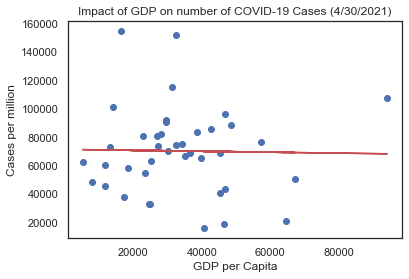

In [39]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidEuro["GDP"],CovidEuro["CasesPerMil"])
print(f"The Pearson correlation between GDP per capita and cases per million is {round(correlation[0],2)}")


# Plot
x_values = CovidEuro["GDP"]
y_values = CovidEuro["CasesPerMil"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('GDP per Capita')
plt.ylabel("Cases per million")
plt.title ("Impact of GDP on number of COVID-19 Cases (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")


# Print
plt.savefig("Output/ScatterEuroGDPvsCases.png")

#Display
plt.show()

The Pearson correlation between HDI and cases per million is -0.04
The r-squared is: 0.0


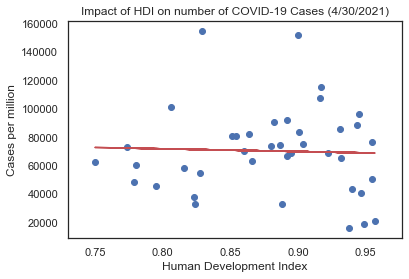

In [40]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidEuro["HDI"],CovidEuro["CasesPerMil"])
print(f"The Pearson correlation between HDI and cases per million is {round(correlation[0],2)}")


# Plot
x_values = CovidEuro["HDI"]
y_values = CovidEuro["CasesPerMil"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Human Development Index')
plt.ylabel("Cases per million")
plt.title ("Impact of HDI on number of COVID-19 Cases (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")


# Print
plt.savefig("Output/ScatterEuroHDIvsCases.png")

#Display
plt.show()

The Pearson correlation between corruption perception and cases per million is -0.05
The r-squared is: 0.0


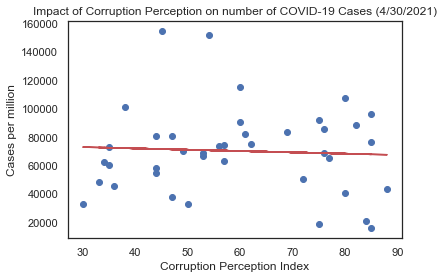

In [41]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidEuro["Score"],CovidEuro["CasesPerMil"])
print(f"The Pearson correlation between corruption perception and cases per million is {round(correlation[0],2)}")


# Plot
x_values = CovidEuro["Score"]
y_values = CovidEuro["CasesPerMil"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Corruption Perception Index')
plt.ylabel("Cases per million")
plt.title ("Impact of Corruption Perception on number of COVID-19 Cases (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")

# Print
plt.savefig("Output/ScatterEuroScoreVsCases.png")

#Display
plt.show()

The Pearson correlation between GDP per capita and deaths per million is -0.28
The r-squared is: 0.08


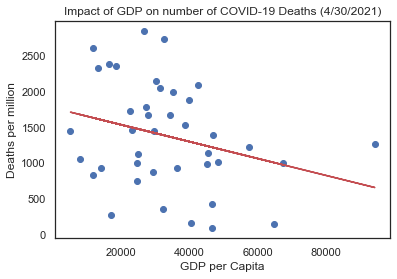

In [42]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidEuro["GDP"],CovidEuro["DeathsPerMil"])
print(f"The Pearson correlation between GDP per capita and deaths per million is {round(correlation[0],2)}")


# Plot
x_values = CovidEuro["GDP"]
y_values = CovidEuro["DeathsPerMil"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('GDP per Capita')
plt.ylabel("Deaths per million")
plt.title ("Impact of GDP on number of COVID-19 Deaths (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")


# Print
plt.savefig("Output/ScatterEuroGDPvsDeaths.png")

#Display
plt.show()

The Pearson correlation between HDI and cases per million is -0.3
The r-squared is: 0.02


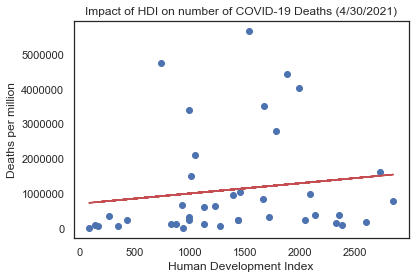

In [43]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidEuro["HDI"],CovidEuro["DeathsPerMil"])
print(f"The Pearson correlation between HDI and cases per million is {round(correlation[0],2)}")


# Plot
x_values = CovidEuro["DeathsPerMil"]
y_values = CovidEuro["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Human Development Index')
plt.ylabel("Deaths per million")
plt.title ("Impact of HDI on number of COVID-19 Deaths (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")


# Print
plt.savefig("Output/ScatterEuroHDIvsDeaths.png")

#Display
plt.show()

The Pearson correlation between corruption perception and deaths per million is -0.36
The r-squared is: 0.13


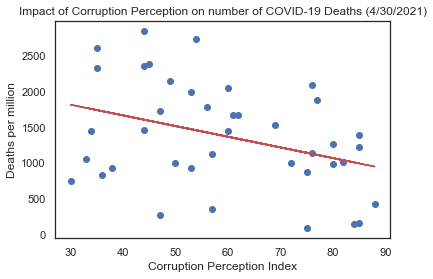

In [44]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidEuro["Score"],CovidEuro["DeathsPerMil"])
print(f"The Pearson correlation between corruption perception and deaths per million is {round(correlation[0],2)}")


# Plot
x_values = CovidEuro["Score"]
y_values = CovidEuro["DeathsPerMil"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Corruption Perception Index')
plt.ylabel("Deaths per million")
plt.title ("Impact of Corruption Perception on number of COVID-19 Deaths (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")


# Print
plt.savefig("Output/ScatterEuroScoreVsCases.png")

#Display
plt.show()

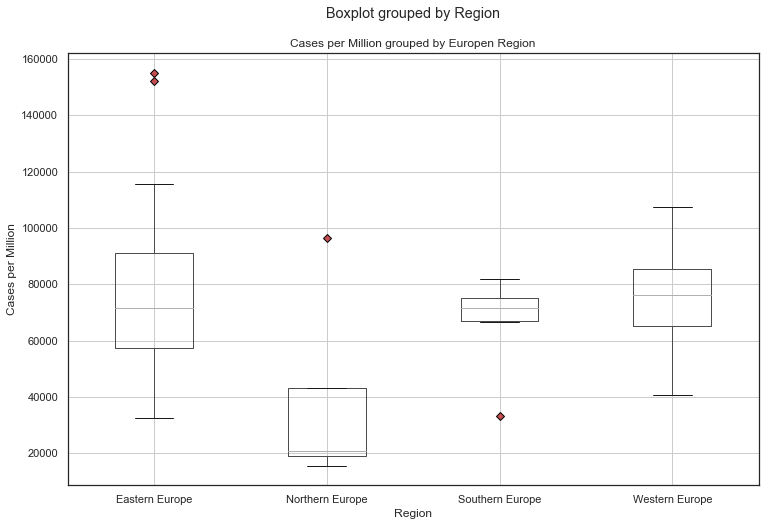

In [68]:
# Marsja, Erik. “Four Ways to Conduct One-Way ANOVA with Python.” Erik Marsja, 19 Nov. 2020, 
# www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/#:~:text=%20ANOVA%20in%20Python%20using%20Statsmodels%20%201,carry%20out%20the%20ANOVA%20in%20Python%0ASave%20More%20.

# Set up Outlier Markers
red_diamond = dict(markerfacecolor='r', marker='D')

#Create a boxplot
CovidEuro.boxplot('CasesPerMil', by='Region', figsize=(12, 8), flierprops = red_diamond)

# ctrl = CovidEuro['Cases/M'][CovidEuro.Region == 'ctrl']
grps = pd.unique(CovidEuro.Region.values)
d_data = {grp:CovidEuro['CasesPerMil'][CovidEuro.Region == grp] for grp in grps}

k = len(pd.unique(CovidEuro.Region))  # number of conditions
N = len(CovidEuro.values)  # conditions times participants
n = CovidEuro.groupby('Region').size()[0] #Participants in each condition
plt.title ("Cases per Million grouped by Europen Region")
plt.ylabel ("Cases per Million")

# Print
plt.savefig("Output/BoxplotCases.png")

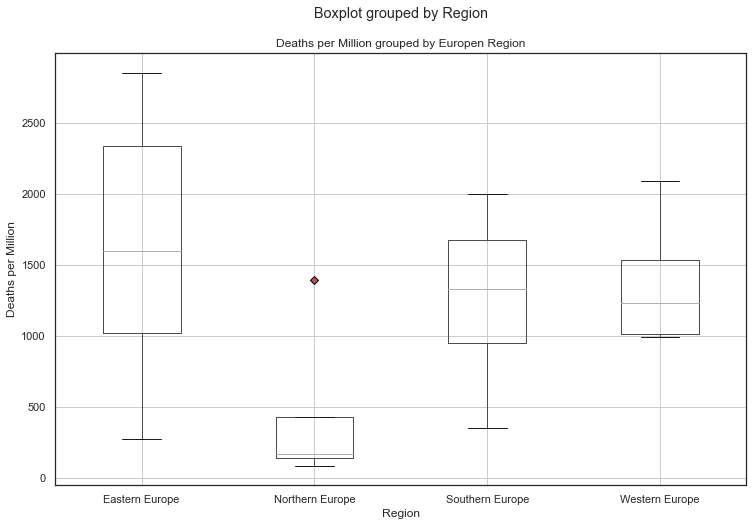

In [69]:
# Marsja, Erik. “Four Ways to Conduct One-Way ANOVA with Python.” Erik Marsja, 19 Nov. 2020, 
# www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/#:~:text=%20ANOVA%20in%20Python%20using%20Statsmodels%20%201,carry%20out%20the%20ANOVA%20in%20Python%0ASave%20More%20.

# Set up Outlier Markers
red_diamond = dict(markerfacecolor='r', marker='D')


#Create a boxplot
CovidEuro.boxplot('DeathsPerMil', by='Region', figsize=(12, 8), flierprops = red_diamond)

# ctrl = CovidEuro['Cases/M'][CovidEuro.Region == 'ctrl']
grps = pd.unique(CovidEuro.Region.values)
d_data = {grp:CovidEuro['DeathsPerMil'][CovidEuro.Region == grp] for grp in grps}

k = len(pd.unique(CovidEuro.Region))  # number of conditions
N = len(CovidEuro.values)  # conditions times participants
n = CovidEuro.groupby('Region').size()[0] #Participants in each condition
plt.title ("Deaths per Million grouped by Europen Region")
plt.ylabel ("Deaths per Million")

# Print
plt.savefig("Output/BoxplotDeaths.png")

# Going Super ANOVA

In [55]:
# identify groups by region

st.describe(Northern['CasesPerMil'])
st.describe(Southern['CasesPerMil'])
st.describe(Eastern['CasesPerMil'])
st.describe(Western['CasesPerMil'])

st.describe(Northern['DeathsPerMil'])
st.describe(Southern['DeathsPerMil'])
st.describe(Eastern['DeathsPerMil'])
st.describe(Western['DeathsPerMil'])

DescribeResult(nobs=20, minmax=(32554.031000000003, 155062.717), mean=77440.07999999999, variance=1115246528.881991, skewness=1.0473961230320468, kurtosis=0.5186508352001753)


## Hypothesis and level of significance
### European regions show no significant difference in COVID-19 related cases or deaths per million of population

#### Ho: North = South = East = West
#### Ha: at least two means are differnt
#### Alpha = 0.05

#### Perform one_way Ananlysis of Variance (ANOVA) test for both Cases and Deaths per Million


In [67]:
# Critical Value Calculation
# population is the total number of countries = 40
# c = number of groups which is 4
# DoF numerator dfn= c-1 or in this case 3
# DoF denominator dfd = n - c or 40-3 or 37
st.f.ppf(q=1-0.05, dfn=3, dfd=37)

2.858796053950291

In [62]:
# perform oneway ANOVA
st.f_oneway(Northern['CasesPerMil'], Southern['CasesPerMil'], Eastern['CasesPerMil'], Western['CasesPerMil'])

F_onewayResult(statistic=2.3934815739512816, pvalue=0.08445817517499504)

In [63]:
# perform oneway ANOVA
st.f_oneway(Northern['DeathsPerMil'], Southern['DeathsPerMil'], Eastern['DeathsPerMil'], Western['DeathsPerMil'])

F_onewayResult(statistic=4.779441133471838, pvalue=0.00663554431600817)

#### Analysis:
Observing our F statistic is more extreme than our critical value for Deaths per Million, Reject Ho and state there is evidence at least two means are different

For Cases per Million, our F statistic is less extreme than our critical value and therefore Ho is accepted.

## Regional T-Tests: Cases

In [25]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(Eastern.Cases, Northern.Cases, equal_var=False)

Ttest_indResult(statistic=1.7560267612367422, pvalue=0.09409122928211959)

In [26]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(Eastern.Cases, Southern.Cases, equal_var=False)

Ttest_indResult(statistic=-0.7987352035481156, pvalue=0.45340999835680884)

In [27]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(Eastern.Cases, Western.Cases, equal_var=False)

Ttest_indResult(statistic=-1.5321474524909329, pvalue=0.15506308077751949)

In [28]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(Northern.Cases, Southern.Cases, equal_var=False)

Ttest_indResult(statistic=-1.5560594402331493, pvalue=0.17455746554601076)

In [29]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(Northern.Cases, Western.Cases, equal_var=False)

Ttest_indResult(statistic=-2.3847070552161584, pvalue=0.0408111120337642)

In [30]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(Western.Cases, Southern.Cases, equal_var=False)

Ttest_indResult(statistic=0.4854248347636007, pvalue=0.6363025012616463)

## Regional T-Tests: Deaths

In [32]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(Eastern.Deaths, Northern.Deaths, equal_var=False)

Ttest_indResult(statistic=2.356769062977063, pvalue=0.027340926205103522)

In [33]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(Eastern.Deaths, Southern.Deaths, equal_var=False)

Ttest_indResult(statistic=-0.8722258296873757, pvalue=0.4170861657045628)

In [34]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(Eastern.Deaths, Western.Deaths, equal_var=False)

Ttest_indResult(statistic=-1.348578785565447, pvalue=0.20632320590398132)

In [35]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(Northern.Deaths, Southern.Deaths, equal_var=False)

Ttest_indResult(statistic=-1.6610597635147588, pvalue=0.15571502305331528)

In [36]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(Northern.Deaths, Western.Deaths, equal_var=False)

Ttest_indResult(statistic=-2.371589211010514, pvalue=0.043649860169314124)

In [37]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(Western.Deaths, Southern.Deaths, equal_var=False)

Ttest_indResult(statistic=0.18342792963518667, pvalue=0.8579067441716164)